# IRIS flower classification with Machine Learning



#### Data Description:

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Importing Dataset

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\Internship\Oasis Infobyt\Task-1\Iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 6)

In [5]:
#ID column in not important for analysing the data, so have to drop ID column

data = data.drop('Id', axis=1)

In [6]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Data Summarization

In [7]:
#shape
data.shape

(150, 5)

In [8]:
#Checking null values

data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#there is no null value in the dataset

In [10]:
#columns name
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
#Species value Counts
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
#Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#Description
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Data Visalization

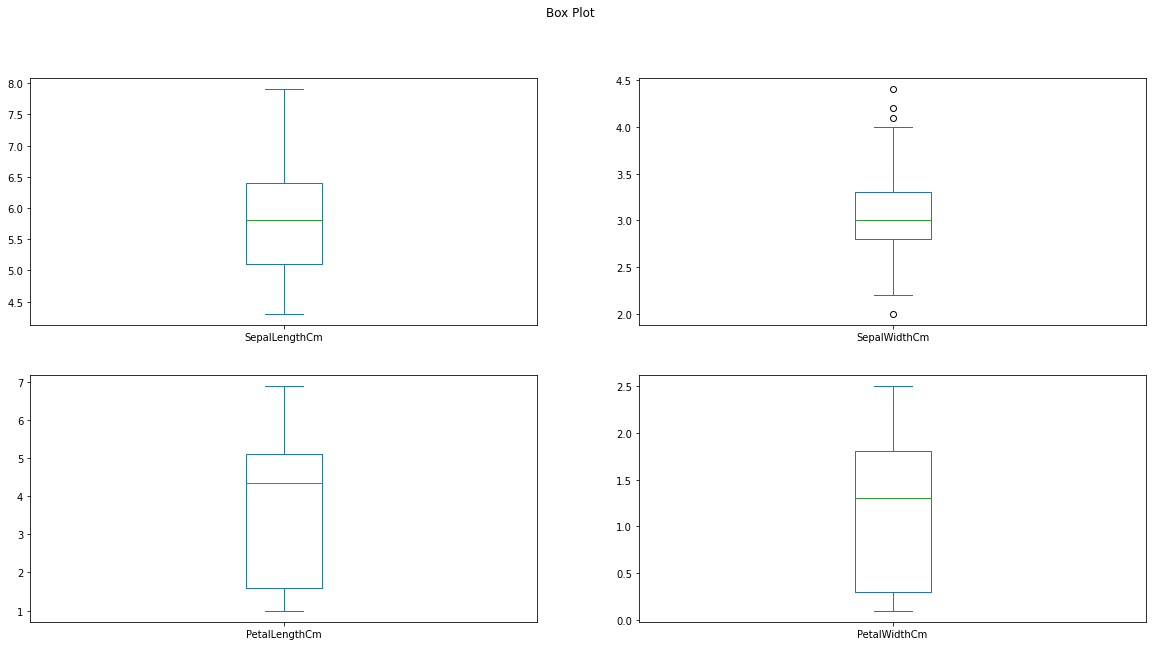

In [14]:
#boxplot
data.plot(kind = 'box', subplots = True, layout=(2,2), sharex=False, sharey= False, figsize=(20,10), title="Box Plot")

plt.show()

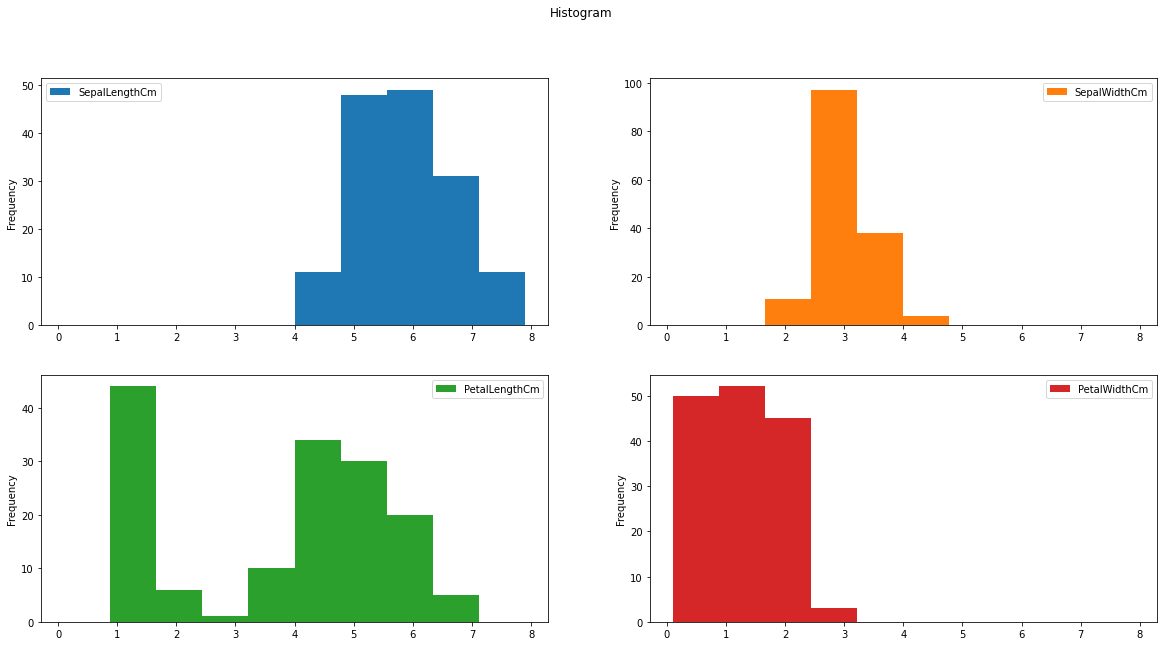

In [15]:
#histogram
data.plot(kind = 'hist', subplots = True, layout=(2,2), sharex=False, sharey= False, figsize=(20,10), title="Histogram")
plt.show()

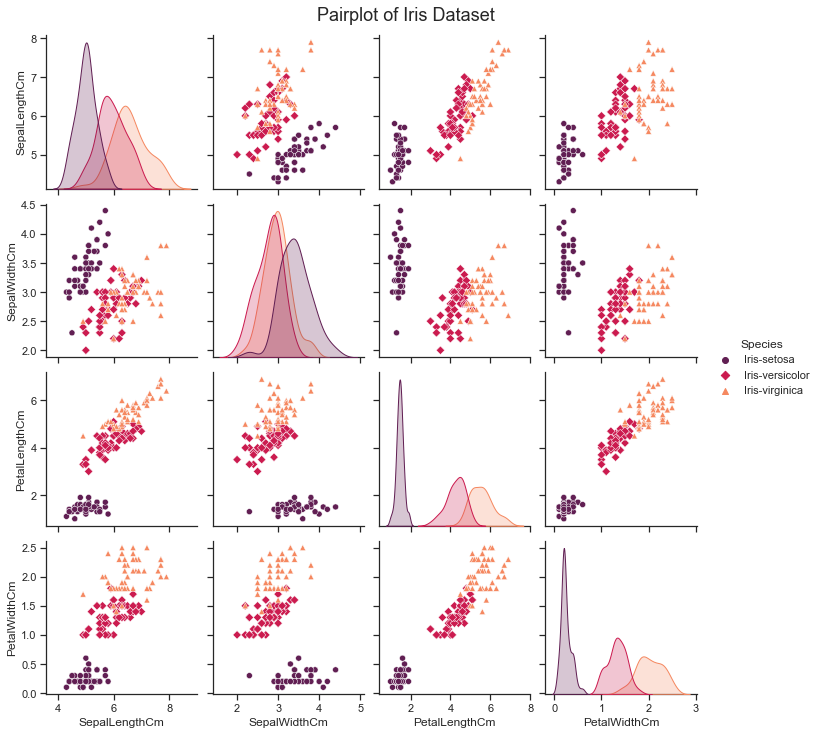

In [16]:
sns.set_theme(style='ticks')
fig=sns.pairplot(data, hue = "Species", markers= ['o','D','^'],palette='rocket')
fig.fig.suptitle('Pairplot of Iris Dataset', y=1.02, fontsize = 18)
plt.show()

In [17]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


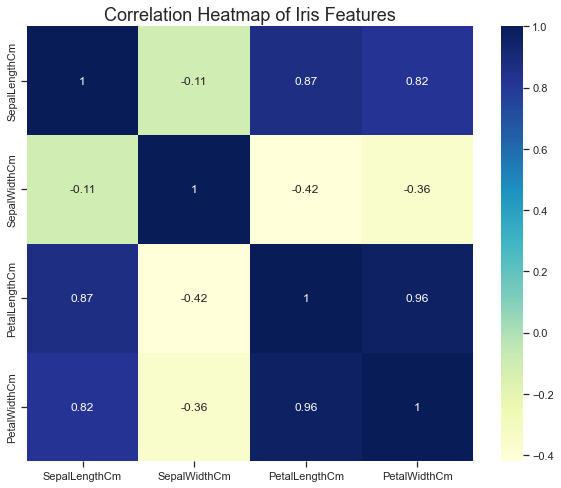

In [18]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Iris Features' , fontsize = 18)
plt.show()



#### Data Preprocessing

In [19]:
x = data.values[:, :4]
y = data.values[:,4]

In [20]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
y
#Transform y into label encoding and built the model

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

#### Transform categorical data to numeric data

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
y = le.fit_transform(y)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Creating a Validation Dataset

In [26]:
#import train_test_split

from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

#### Model Selection

#### Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Model Performance:
Logistic Regression: 1.0
Decision Tree Classifier: 0.9666666666666667
Random Forest Classifier: 0.9666666666666667
K Nearest Neighbors Classifier: 0.9666666666666667
Support Vector Machine Classifier: 0.9666666666666667


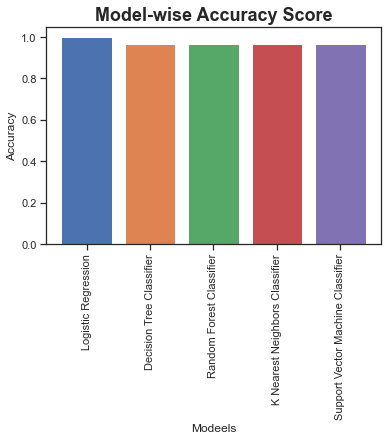

In [29]:
#models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("K Nearest Neighbors Classifier", KNeighborsClassifier()),
    ("Support Vector Machine Classifier", SVC())
]

#train models

results = []

for name,model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name,accuracy))
    
#print result
    
print("Model Performance:")
for name,accuracy in results:
    print(f'{name}: {accuracy}')
    plt.bar(name,accuracy)
    plt.xticks(rotation= 90)
    plt.xlabel("Modeels")
    plt.ylabel("Accuracy")
    plt.title("Model-wise Accuracy Score", fontsize=18, fontweight= 'bold')
    
#prepare a bar chart



#### Model Testing

In [32]:
#show Y pred y test
y_test 

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [33]:
#map labeled column (y_test,y_pred)
def map_label(label):
    if label == 0:
        return "Iris-setosa"
    elif label == 1:
        return "Iris-versicolor"
    elif label == 2:
        return "Iris-virginica"
    else:
        return "Unknown"
    

mapped_y_pred = list(map(map_label,y_pred))
mapped_y_test = list(map(map_label,y_test))

In [34]:
#tally y_test and y_pred value
df = pd.DataFrame({"y_test":mapped_y_test, "y_pred":mapped_y_pred})

In [35]:
df

,y_test,y_pred
0,Iris-versicolor,Iris-versicolor
1,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor
